In [53]:
import pandas as pd
import numpy as np

In [54]:
file_path = '../data/raw/Dataset.csv'
df = pd.read_csv(file_path)

In [55]:
df.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,32.0,Montana,Free,Yearly,2,Paypal,Medium,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,2,64.0,New Jersey,Free,Monthly,3,Paypal,Low,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,3,51.0,Washington,Premium,Yearly,2,Credit Card,High,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,4,63.0,California,Family,Yearly,4,Apple Pay,Medium,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,5,54.0,Washington,Family,Monthly,3,Paypal,High,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


In [56]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 125000 non-null  int64  
 1   age                         112090 non-null  float64
 2   location                    123667 non-null  object 
 3   subscription_type           123667 non-null  object 
 4   payment_plan                125000 non-null  object 
 5   num_subscription_pauses     125000 non-null  int64  
 6   payment_method              125000 non-null  object 
 7   customer_service_inquiries  125000 non-null  object 
 8   signup_date                 125000 non-null  int64  
 9   weekly_hours                112089 non-null  float64
 10  average_session_length      125000 non-null  float64
 11  song_skip_rate              125000 non-null  float64
 12  weekly_songs_played         125000 non-null  int64  
 13  weekly_unique_

None

In [57]:
display(df.describe())

,customer_id,age,num_subscription_pauses,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
count,125000.000000,112090.000000,125000.000000,125000.000000,112089.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000
mean,62500.500000,48.422758,1.991144,-1460.678936,25.054440,60.421725,0.500802,250.823928,150.783344,24.499888,99.713240,49.458048,24.554224,24.446848,0.513392
std,36084.536162,17.897879,1.417201,844.132871,14.443771,34.383782,0.288706,143.327606,85.794952,14.445979,57.681372,28.935305,14.454823,14.422850,0.499823
min,1.000000,18.000000,0.000000,-2922.000000,0.000068,1.000526,0.000006,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31250.750000,33.000000,1.000000,-2190.000000,12.492946,30.644177,0.250974,127.000000,76.000000,12.000000,50.000000,24.000000,12.000000,12.000000,0.000000
50%,62500.500000,48.000000,2.000000,-1462.000000,25.150816,60.340977,0.501162,251.000000,150.000000,25.000000,100.000000,49.000000,25.000000,24.000000,1.000000
75%,93750.250000,64.000000,3.000000,-728.000000,37.600841,90.234158,0.751110,375.000000,225.000000,37.000000,150.000000,75.000000,37.000000,37.000000,1.000000
max,125000.000000,79.000000,4.000000,-1.000000,49.999943,119.996501,0.999970,499.000000,299.000000,49.000000,199.000000,99.000000,49.000000,49.000000,1.000000


In [58]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features: ", numerical_features)
print("Categorical Features: ", categorical_features)

Numerical Features:  ['customer_id', 'age', 'num_subscription_pauses', 'signup_date', 'weekly_hours', 'average_session_length', 'song_skip_rate', 'weekly_songs_played', 'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends', 'num_playlists_created', 'num_shared_playlists', 'notifications_clicked', 'churned']
Categorical Features:  ['location', 'subscription_type', 'payment_plan', 'payment_method', 'customer_service_inquiries']


In [59]:
# Check missing values
print("\nMissing Values Count:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Count', 'Missing Percentage']
display(missing_data[missing_data['Missing Count'] > 0])


Missing Values Count:


,Missing Count,Missing Percentage
age,12910,10.3280
location,1333,1.0664
subscription_type,1333,1.0664
weekly_hours,12911,10.3288


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

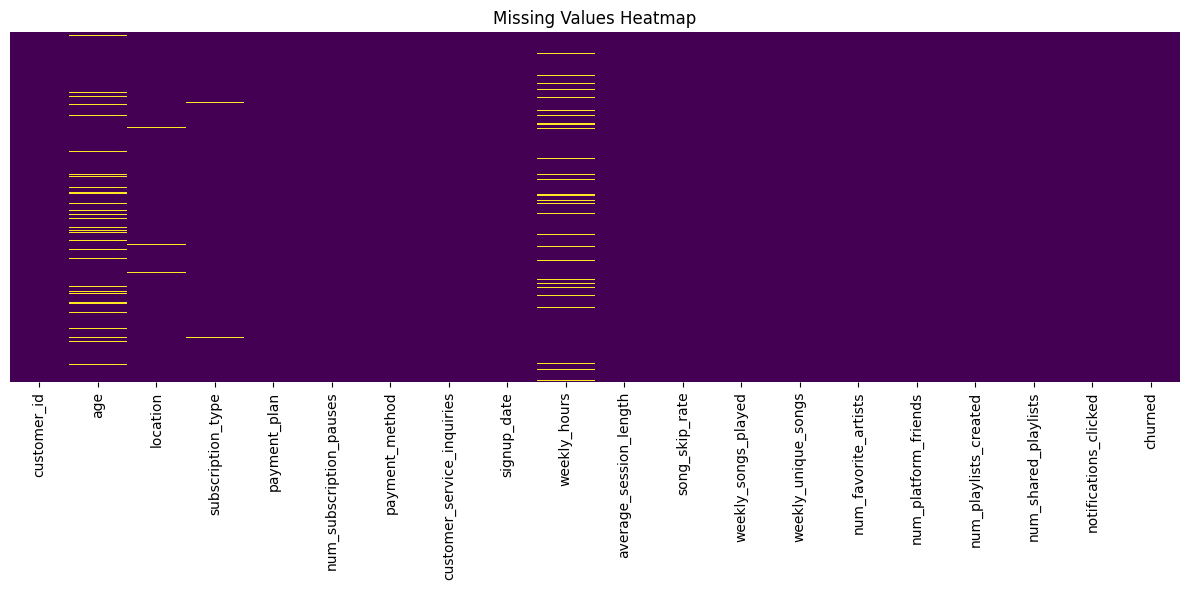

In [61]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [62]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)

Number of duplicate rows:  0


In [63]:
print("Summary statistics for age column:")
display(df['age'].describe())

Summary statistics for age column:


count    112090.000000
mean         48.422758
std          17.897879
min          18.000000
25%          33.000000
50%          48.000000
75%          64.000000
max          79.000000
Name: age, dtype: float64

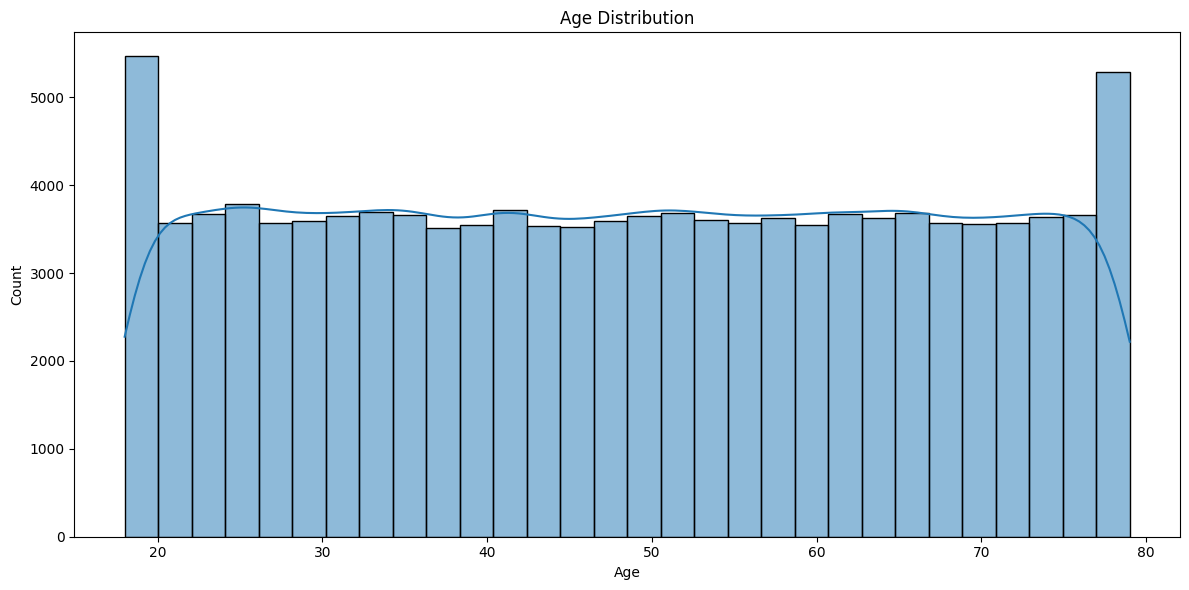

In [64]:
#Visualize age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

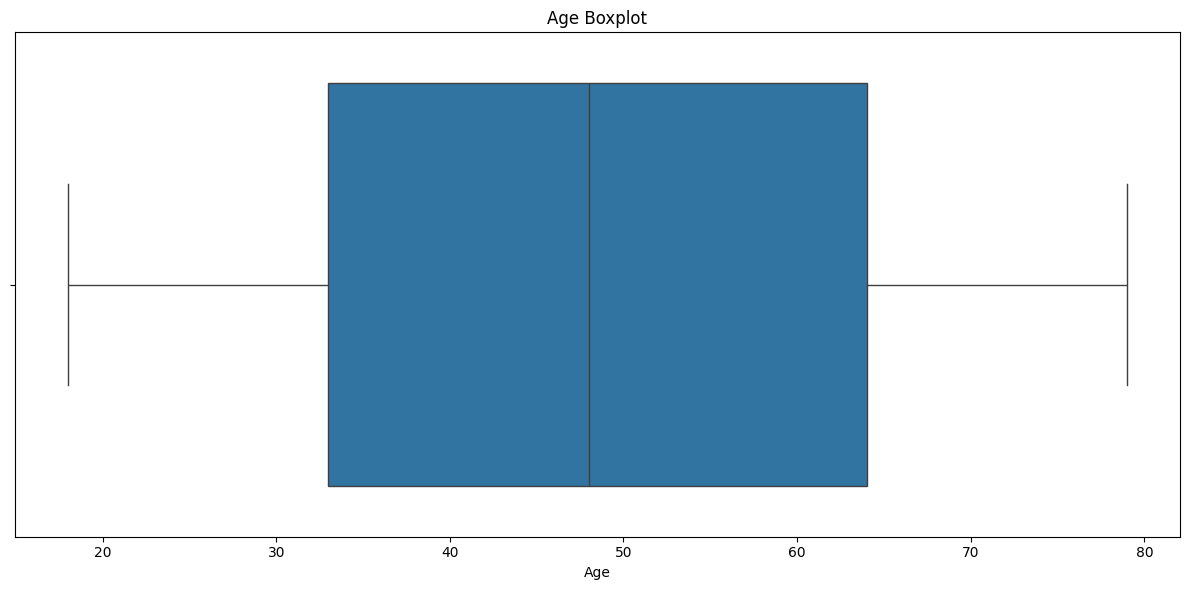

In [65]:
#Visualize age boxplot for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', data=df)
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

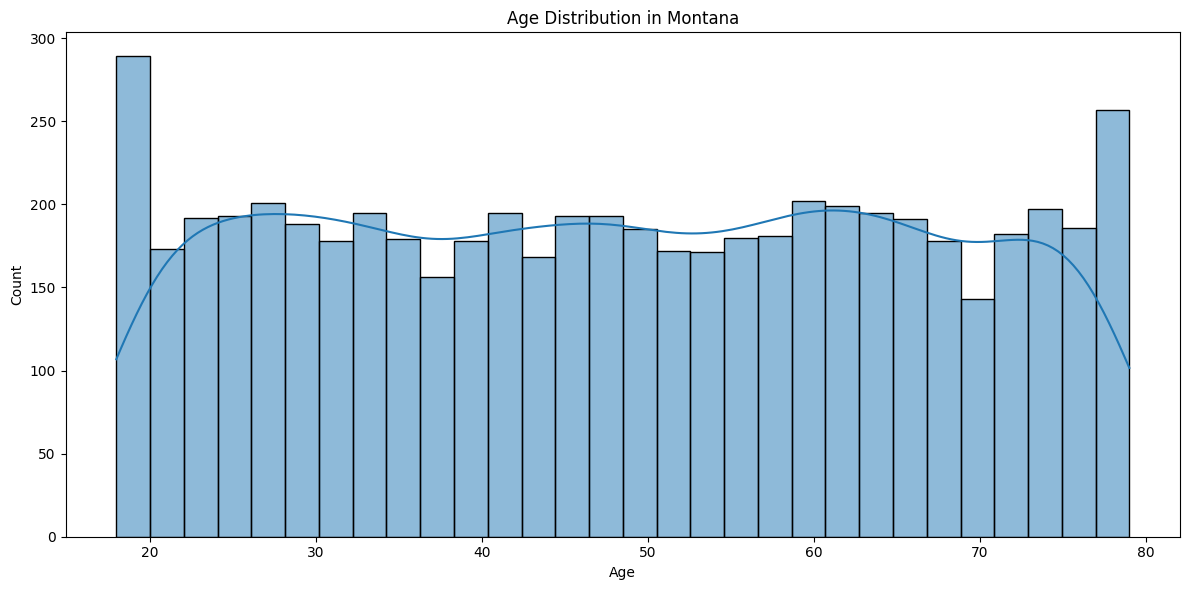

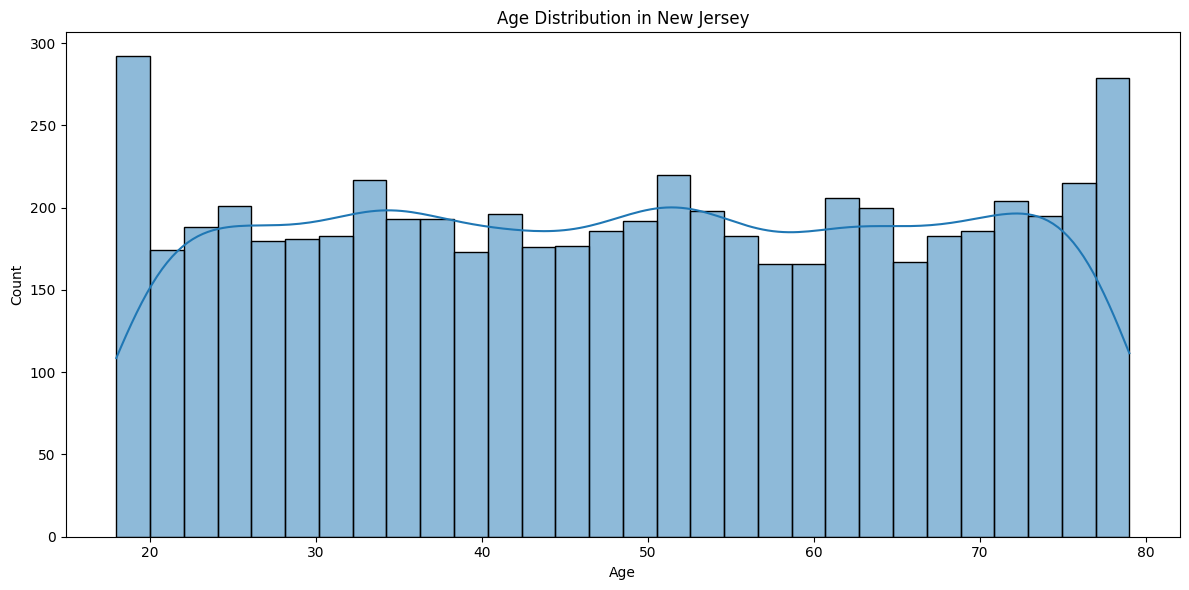

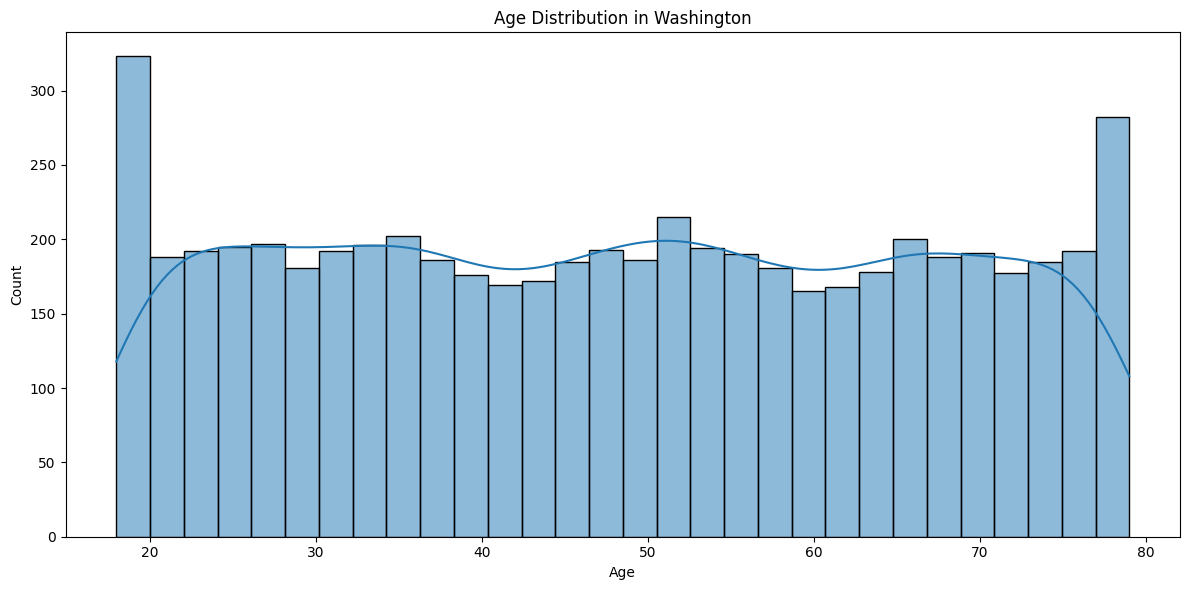

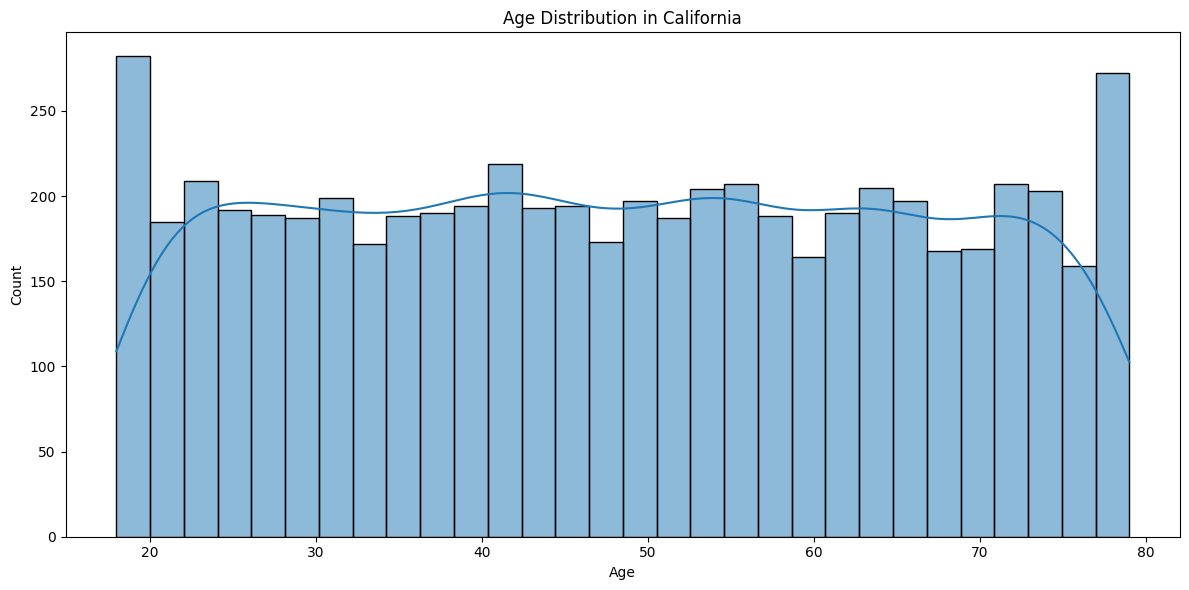

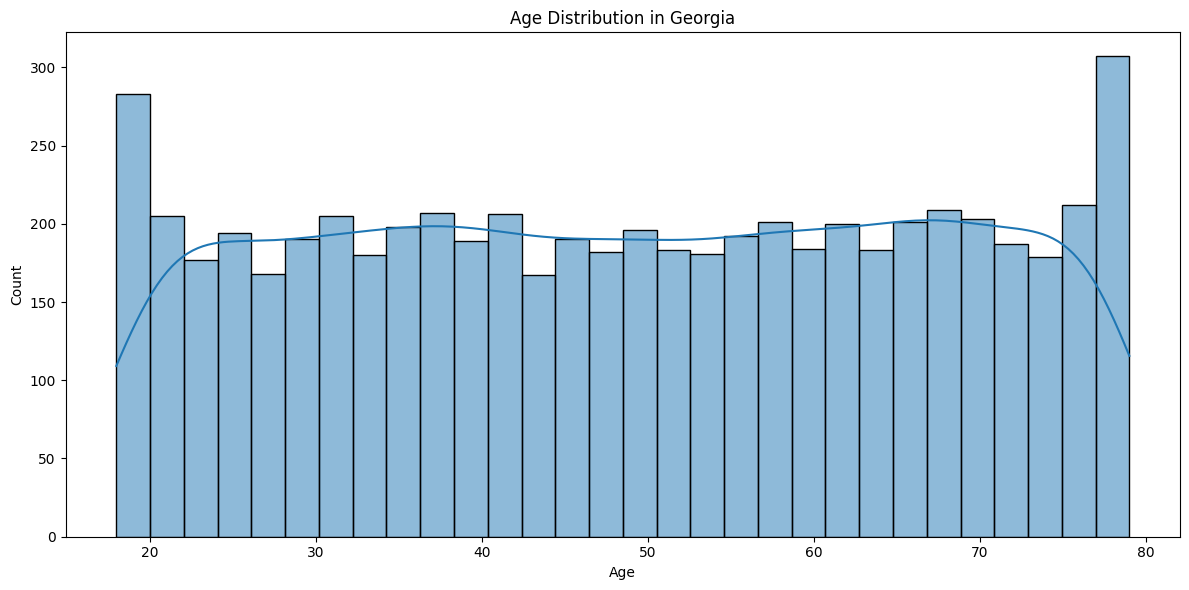

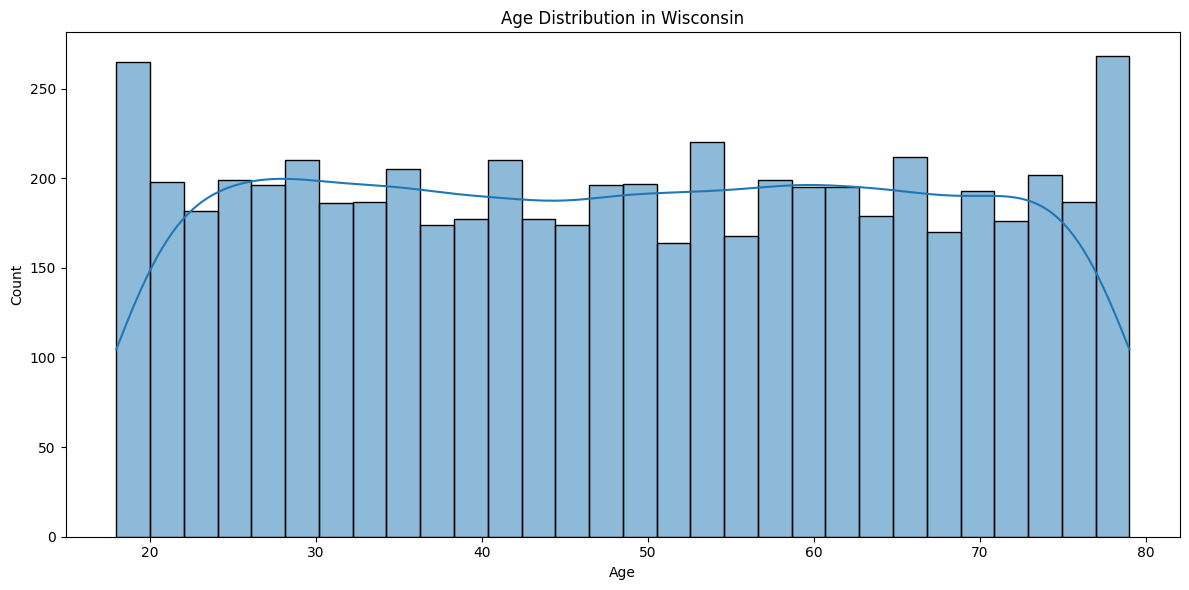

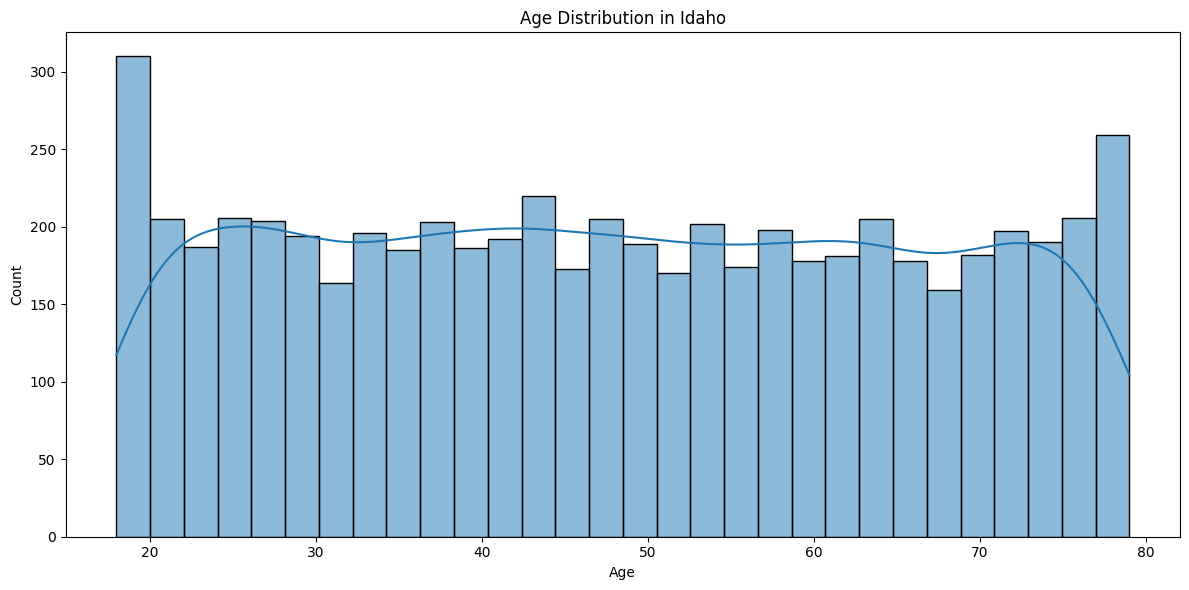

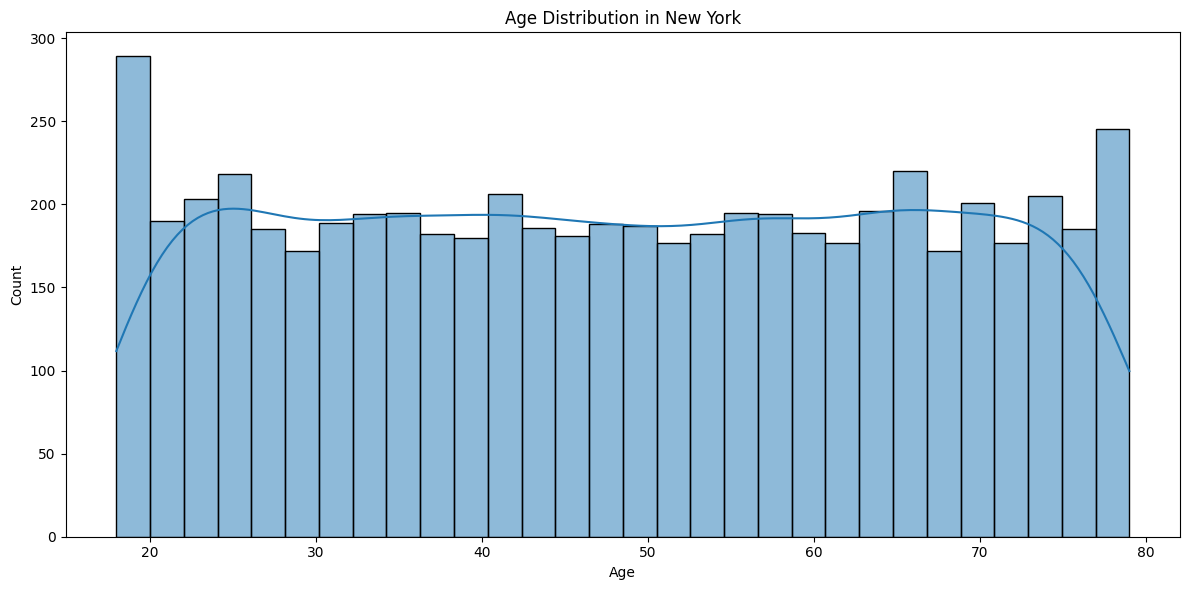

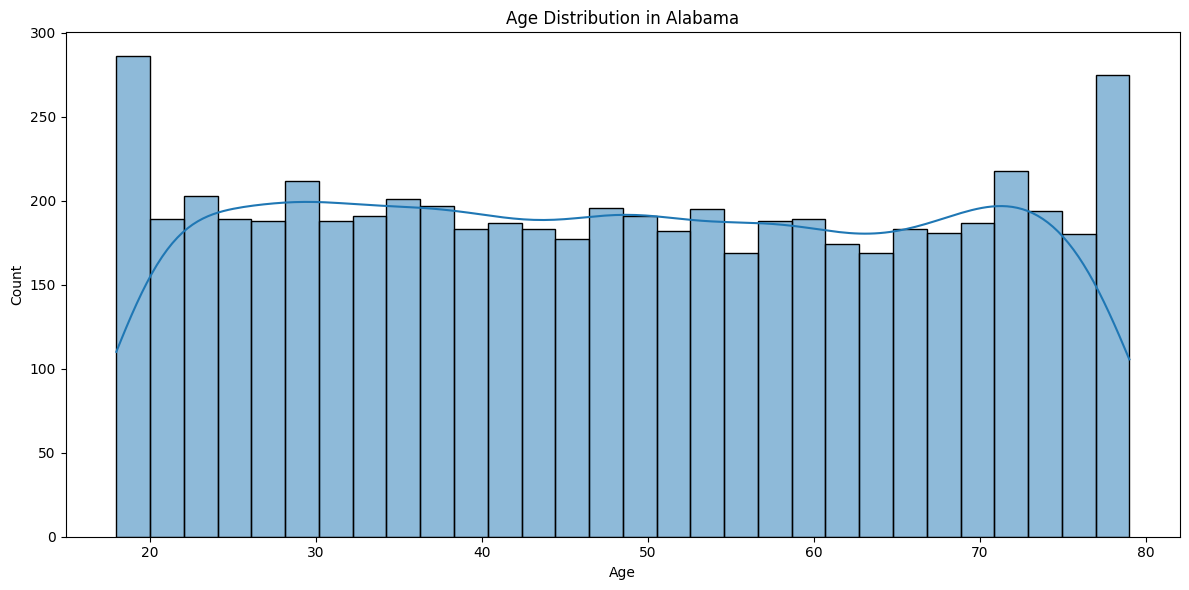

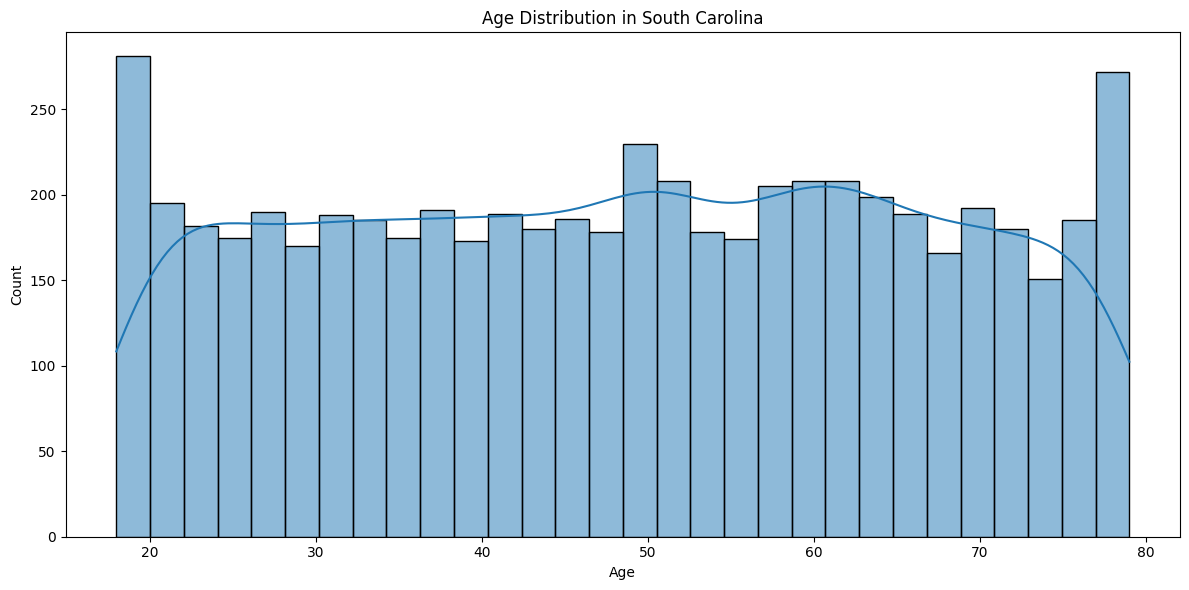

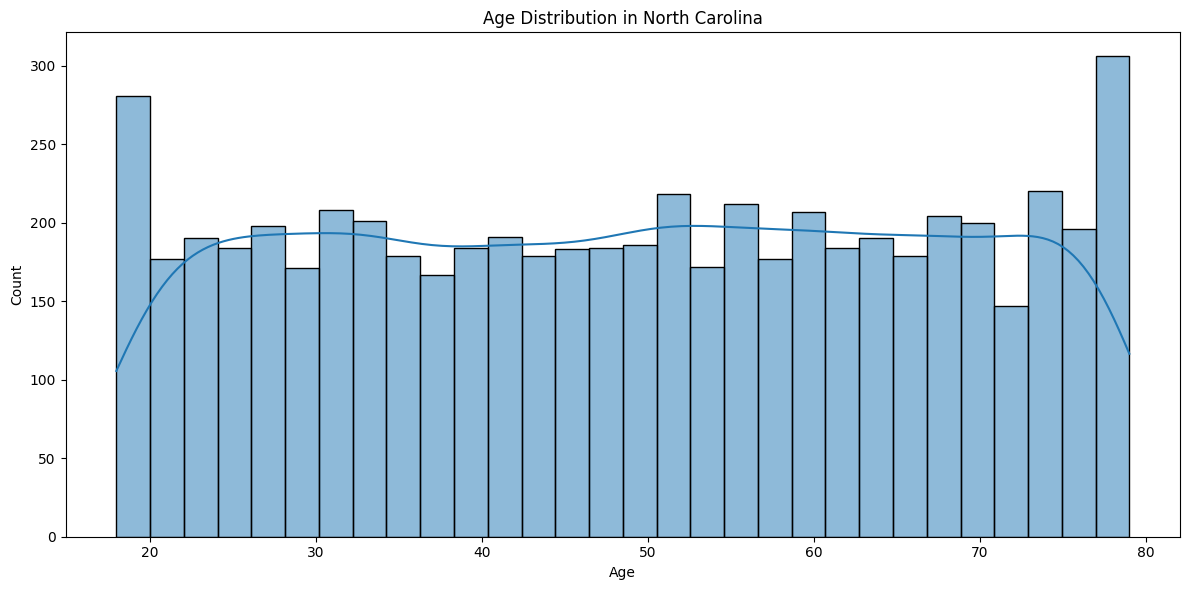

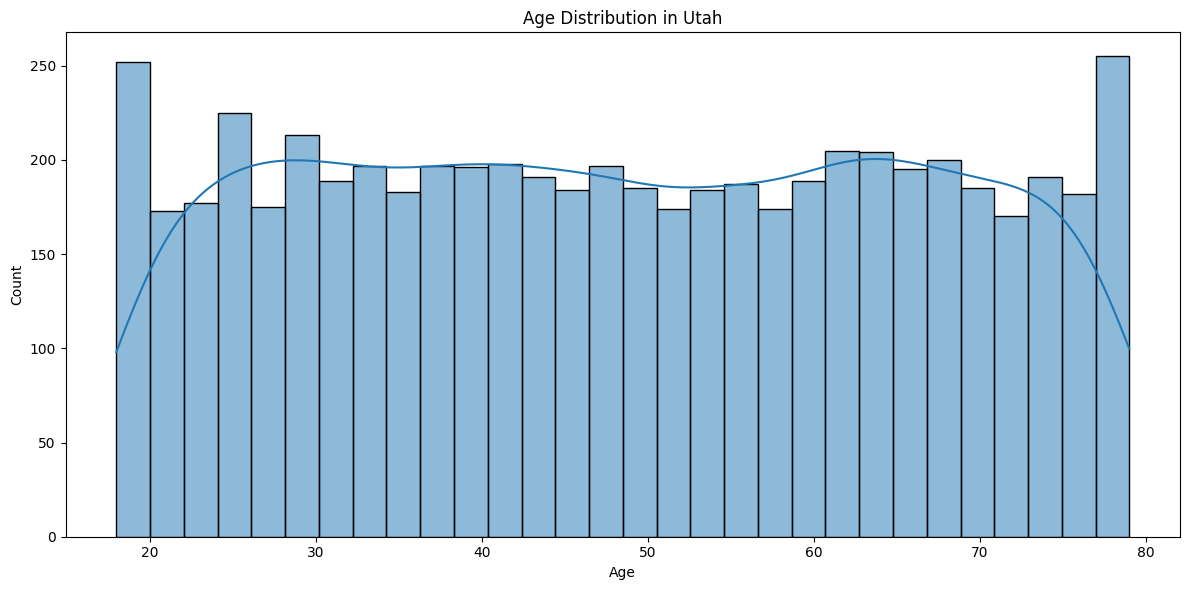

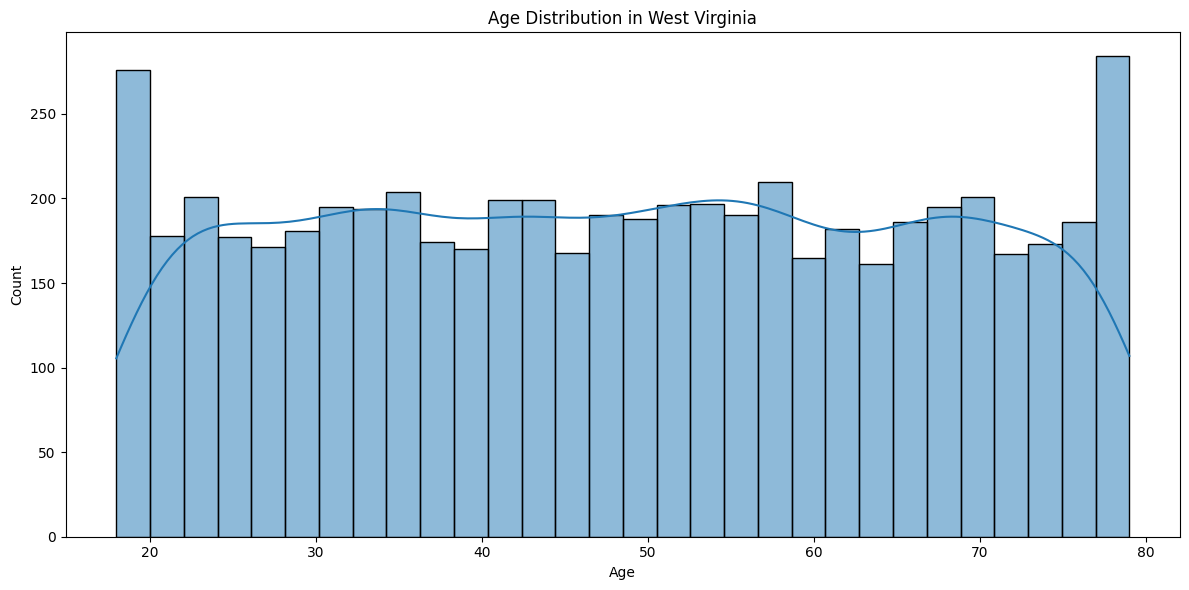

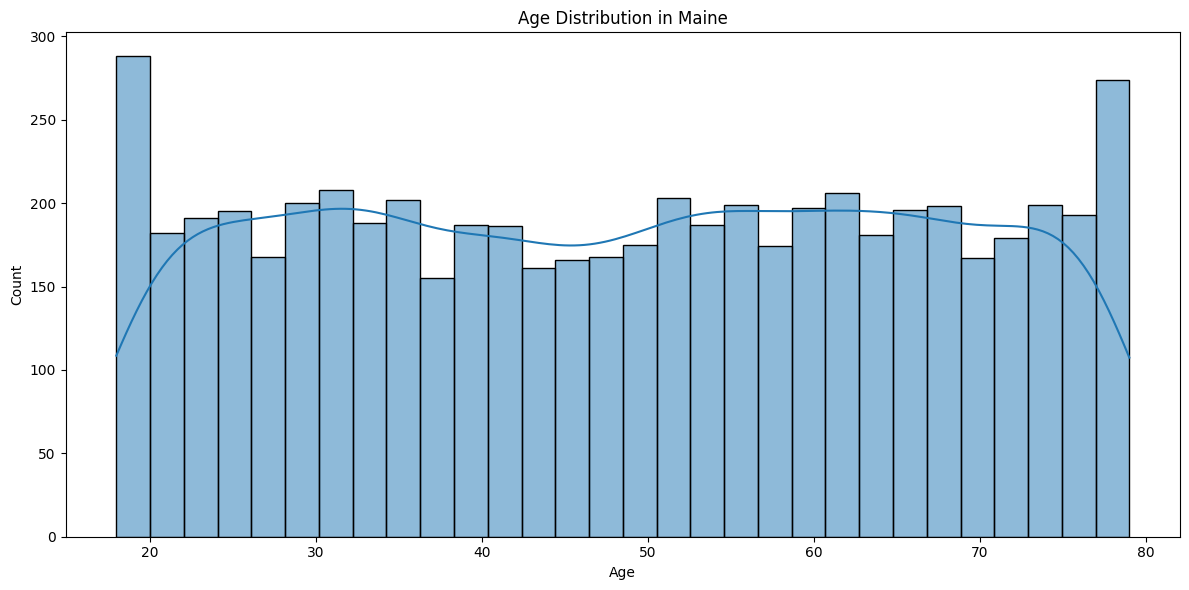

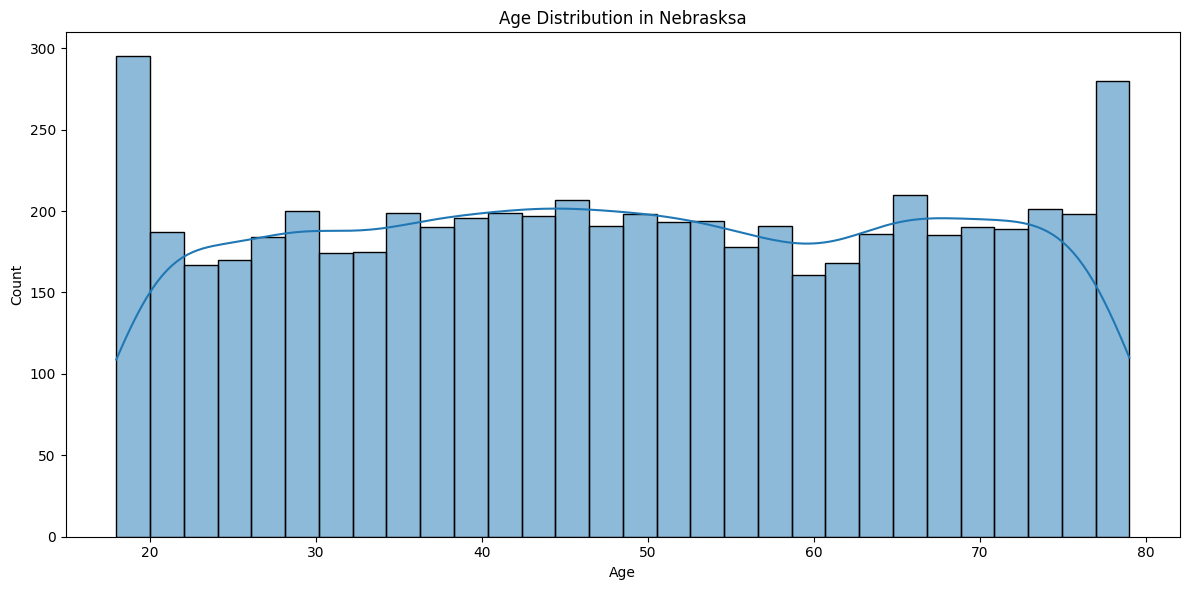

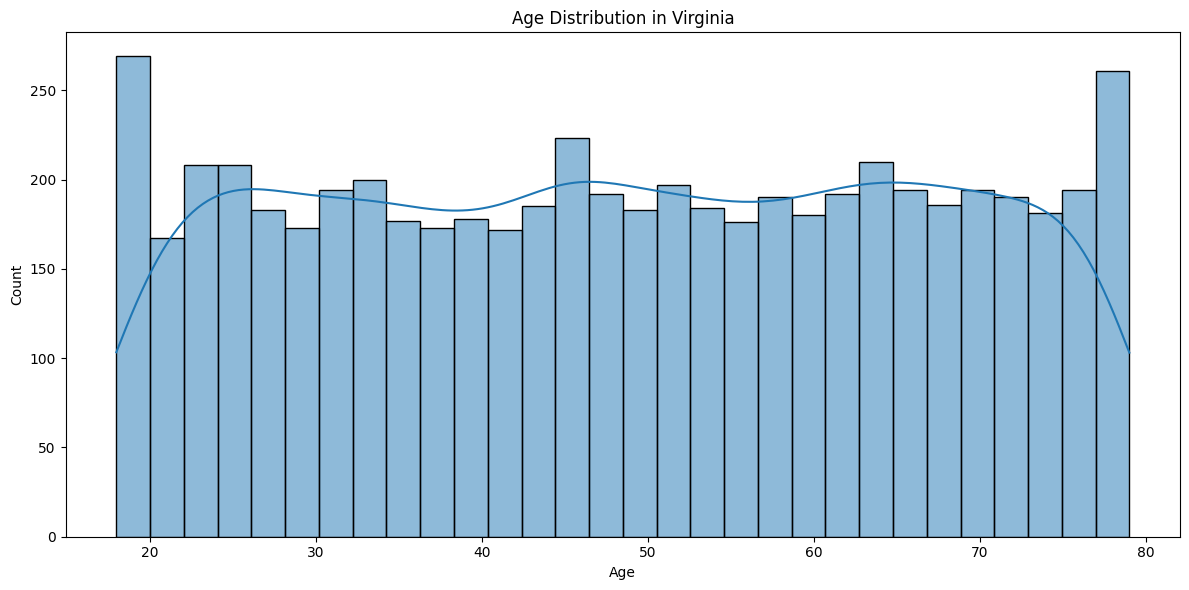

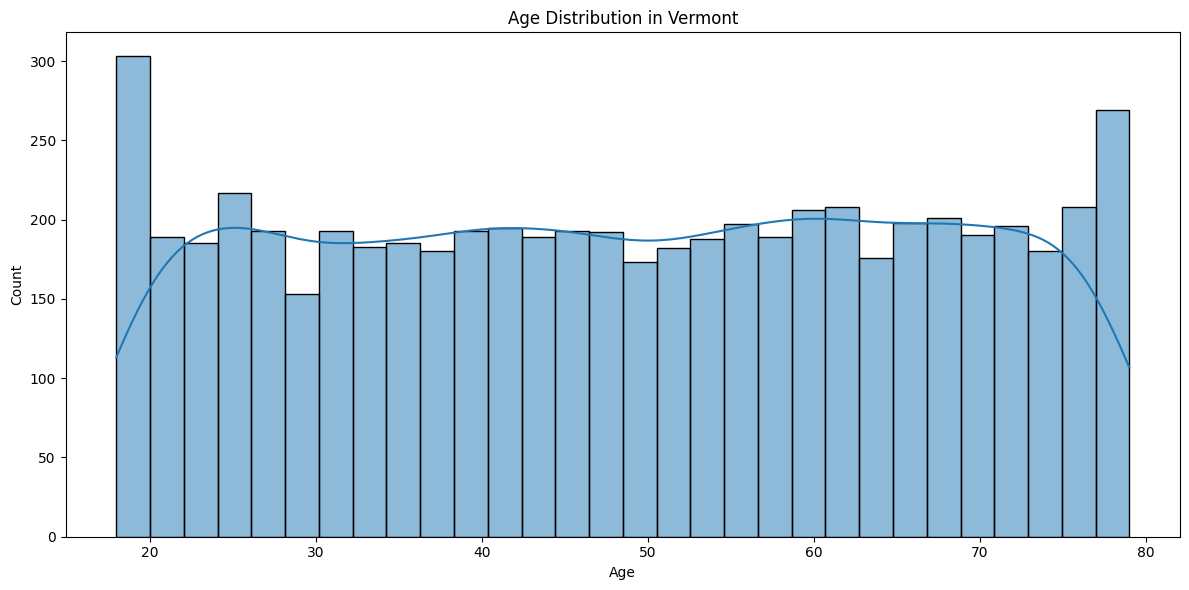

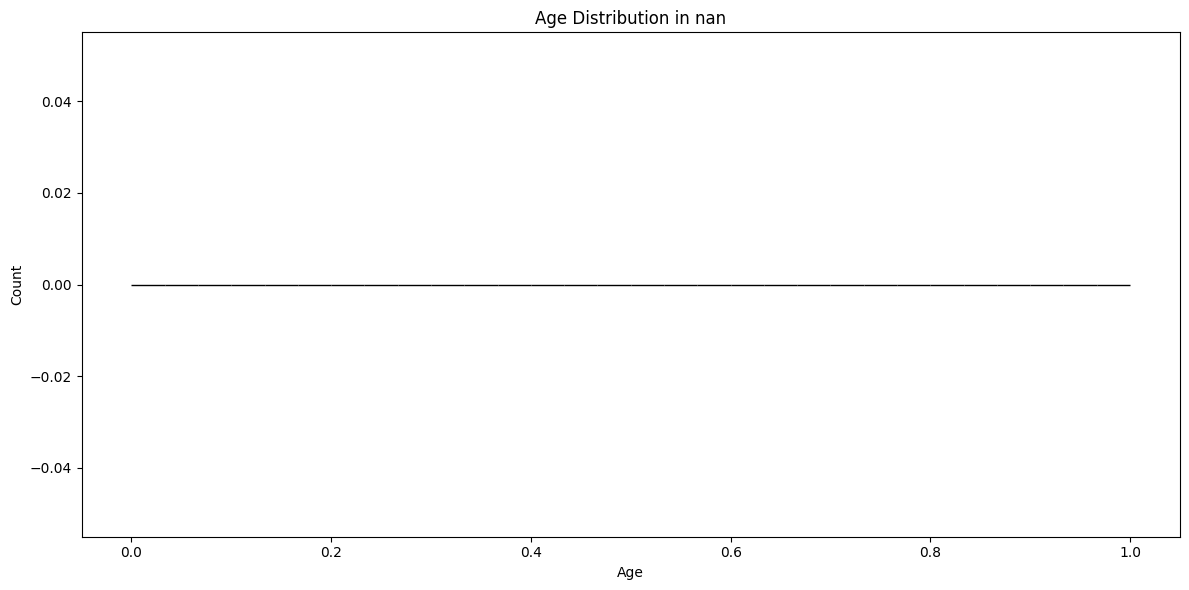

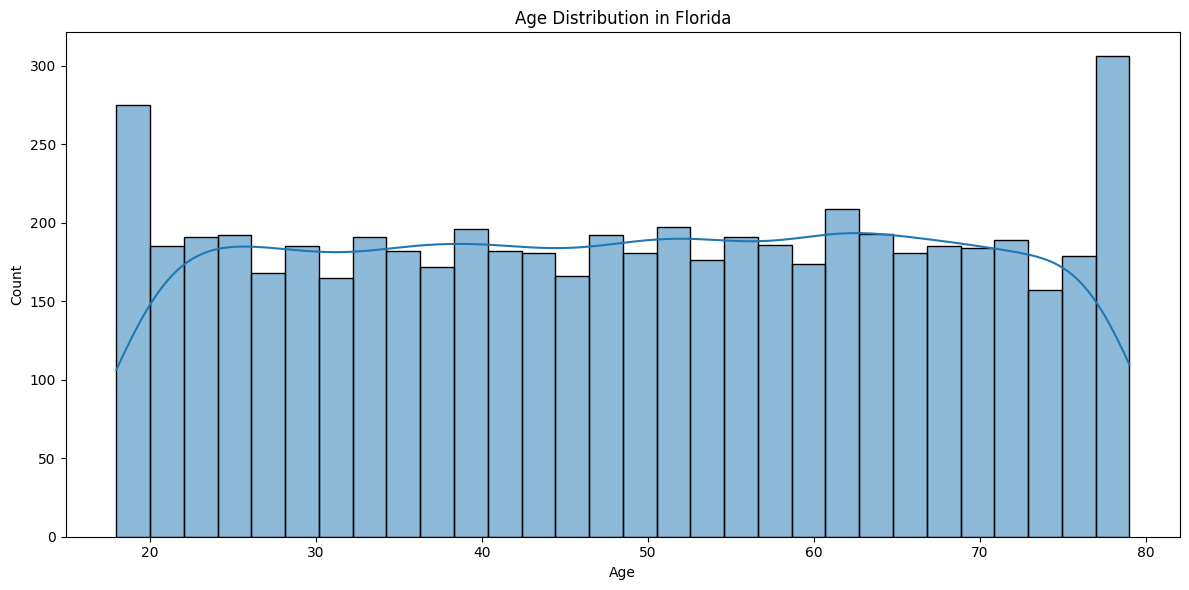

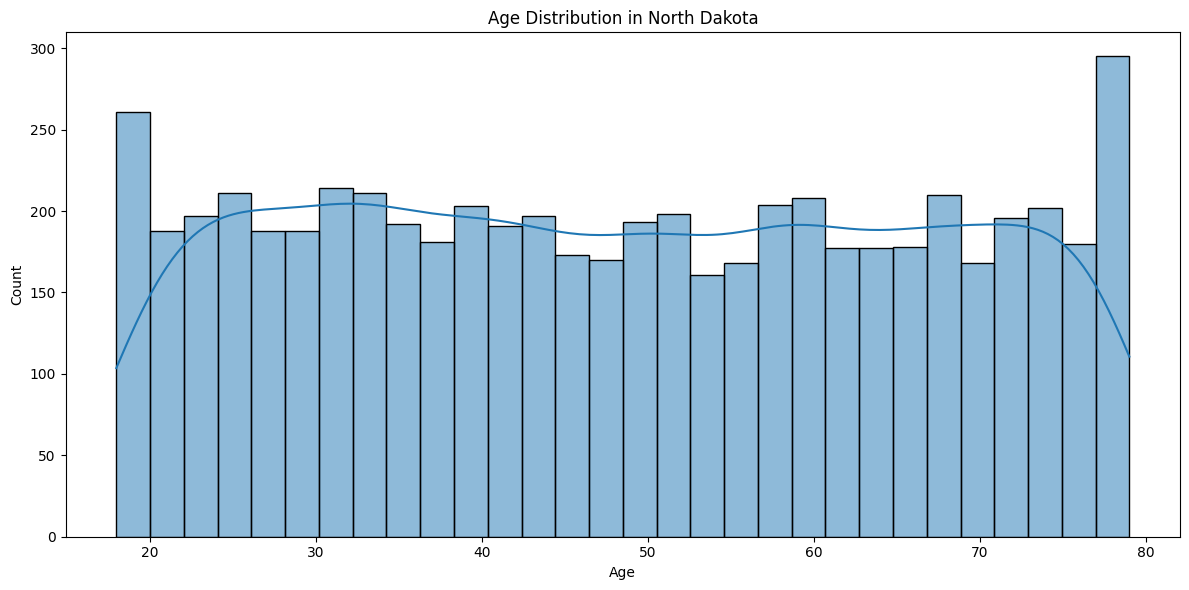

In [66]:
for city in df['location'].unique():
    df_city = df[df['location'] == city]

    # Plot the age distribution for city
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_city, x='age', bins=30, kde=True)
    plt.title('Age Distribution in {city}'.format(city=city))
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## Age Analysis

### Missing Data
- The `Age` column has approximately **10% missing values**.

### Distribution
- The distribution of `Age` follows a **uniform distribution**.

### Imputation Strategy
- Since the distribution is uniform, we will **fill the missing values** using a **random value**.
- The random value will be from the non-missing value of age in dataset.

In [67]:
df['age'] = df['age'].apply(lambda x: np.random.choice(df['age'].dropna()) if pd.isnull(x) else x)

In [68]:
missing_ages_after = df['age'].isnull().sum()
print(f"Number of missing values in 'age' after filling: {missing_ages_after}")

Number of missing values in 'age' after filling: 0


In [69]:
print("Summary statistics for weekly_hours column:")
display(df['weekly_hours'].describe())

Summary statistics for weekly_hours column:


count    112089.000000
mean         25.054440
std          14.443771
min           0.000068
25%          12.492946
50%          25.150816
75%          37.600841
max          49.999943
Name: weekly_hours, dtype: float64

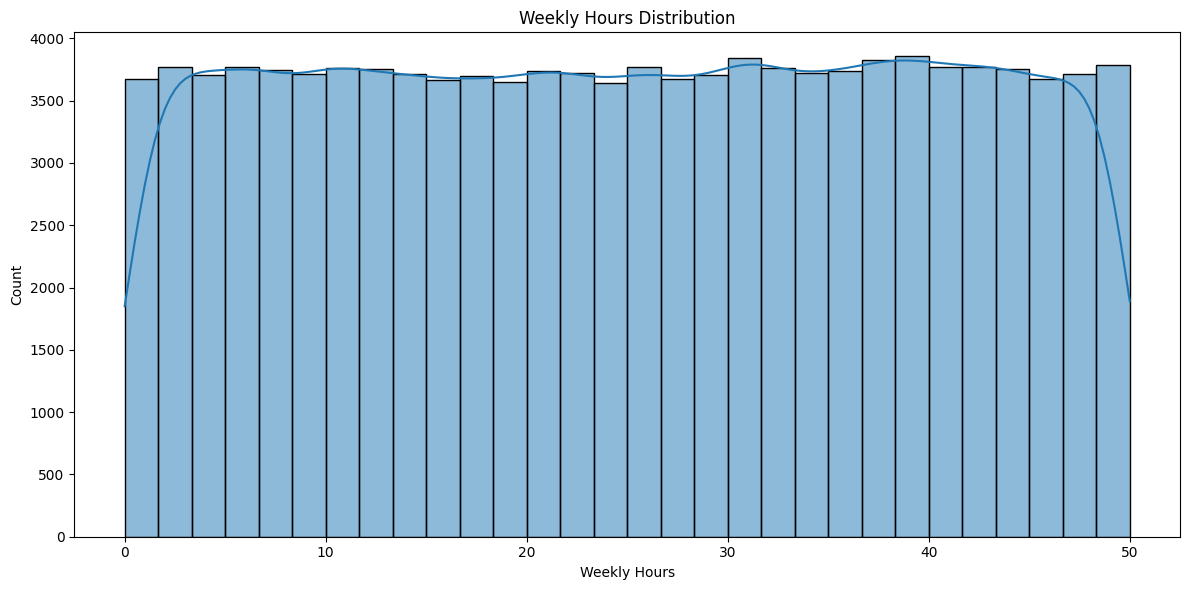

In [70]:
#Visualize weekly_hours distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['weekly_hours'], bins=30, kde=True)
plt.title('Weekly Hours Distribution')
plt.xlabel('Weekly Hours')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Weekly Hours Analysis

### Missing Data
- The `Weekly Hours` column has approximately **10% missing values**.

### Distribution
- The distribution of `Weekly Hours` follows a **uniform distribution**.

### Imputation Strategy
- Since the distribution is uniform, we will **fill the missing values** using a **random value**.
- The random value will be from the non-missing value of age in dataset.

In [71]:
df['weekly_hours'] = df['weekly_hours'].apply(lambda x: np.random.choice(df['weekly_hours'].dropna()) if pd.isnull(x) else x)

In [72]:
missing_weekly_hours_after = df['weekly_hours'].isnull().sum()
print(f"Number of missing values in 'weekly_hours' after filling: {missing_weekly_hours_after}")

Number of missing values in 'weekly_hours' after filling: 0


C:\Users\athar\AppData\Local\Temp\ipykernel_19064\1026128862.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_ratio.index, y=churn_ratio.values, palette='viridis')


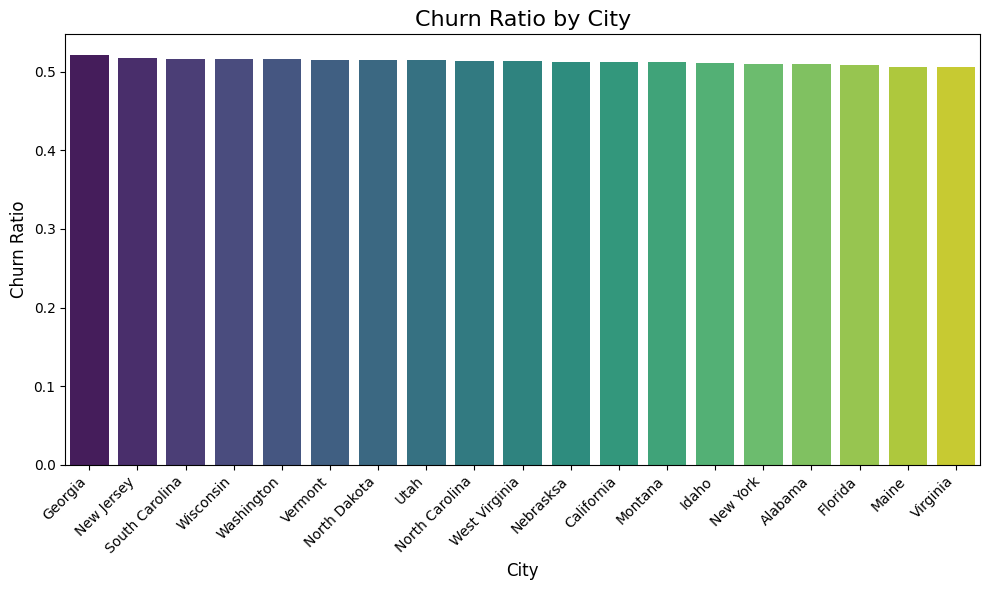

In [73]:
churn_ratio = df.groupby('location')['churned'].mean().sort_values(ascending=False)

# Plot the churn ratio
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_ratio.index, y=churn_ratio.values, palette='viridis')
plt.title('Churn Ratio by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Churn Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


location unique values:
location
Georgia           6646
Idaho             6616
Vermont           6607
California        6590
New Jersey        6570
Washington        6567
Nebrasksa         6535
North Carolina    6523
North Dakota      6523
Utah              6507
New York          6493
Alabama           6489
Wisconsin         6486
Virginia          6467
Maine             6457
South Carolina    6450
West Virginia     6415
Florida           6400
Montana           6326
Name: count, dtype: int64


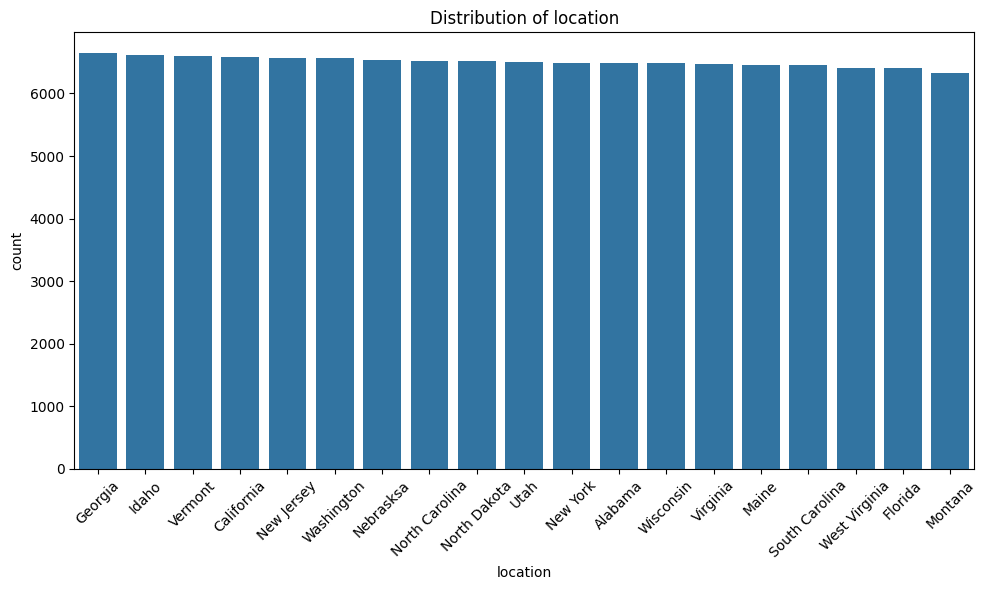

In [74]:
print(f"\n{'location'} unique values:")
print(df['location'].value_counts())

# Visualize the distribution 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='location', order=df['location'].value_counts().index)
plt.title(f'Distribution of location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Location Analysis

### Distribution
 - Almost all the city have same amount of user as well as same churn ratio.
 - The distribution is `Uniform Distribution`


### Imputation Technique

 - The missing value in the `location` will be populated by using **random value** from the list of **cities** .

In [75]:
df['location'] = df['location'].apply(lambda x: np.random.choice(df['location'].dropna()) if pd.isnull(x) else x)

C:\Users\athar\AppData\Local\Temp\ipykernel_19064\84294984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscription_type_ratio.index, y=subscription_type_ratio.values, palette='viridis')


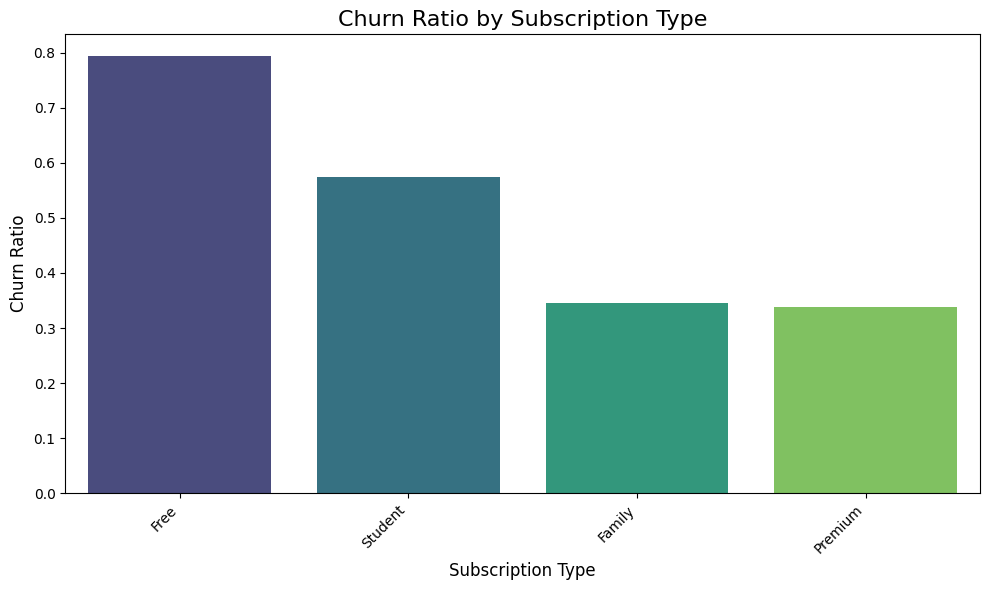

In [76]:
subscription_type_ratio = df.groupby('subscription_type')['churned'].mean().sort_values(ascending=False)

# Plot the churn ratio
plt.figure(figsize=(10, 6))
sns.barplot(x=subscription_type_ratio.index, y=subscription_type_ratio.values, palette='viridis')
plt.title('Churn Ratio by Subscription Type', fontsize=16)
plt.xlabel('Subscription Type', fontsize=12)
plt.ylabel('Churn Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Subscription Type unique values:
subscription_type
Premium    30998
Student    30986
Free       30936
Family     30747
Name: count, dtype: int64


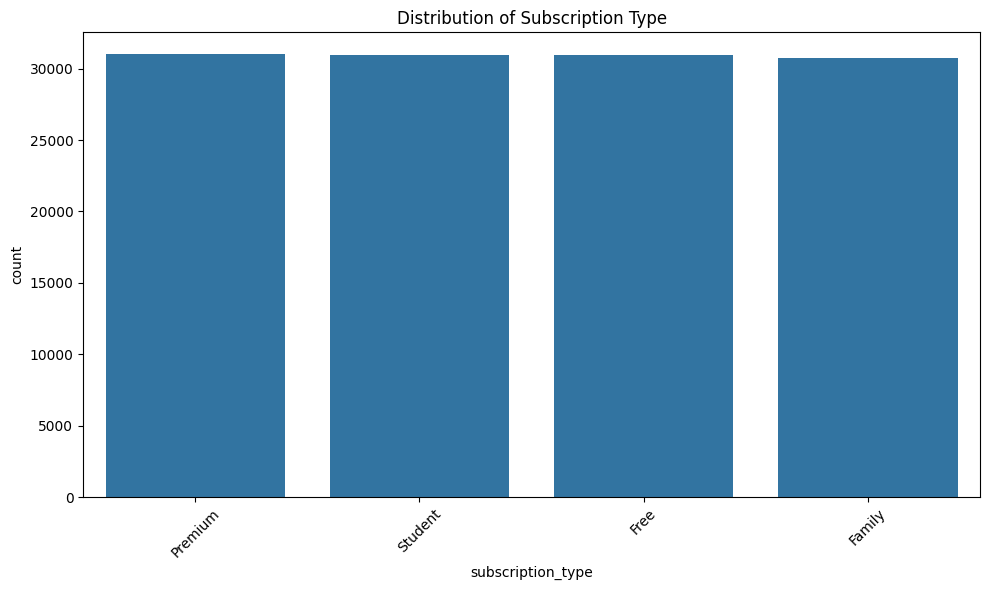

In [77]:
print(f"\nSubscription Type unique values:")
print(df['subscription_type'].value_counts())

# Visualize the distribution 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='subscription_type', order=df['subscription_type'].value_counts().index)
plt.title(f'Distribution of Subscription Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Subscription Type Analysis

### Distribution
 - The distribution of different types of users using teh platform is `Uniform Distribution`


### Imputation Technique

 - The missing value in the `subscription_type` will be populated by using **random value** from the list of **subscription types** .

In [78]:
df['subscription_type'] = df['subscription_type'].apply(lambda x: np.random.choice(df['subscription_type'].dropna()) if pd.isnull(x) else x)

In [79]:
# Verify missing values are handled
print("\nMissing values after imputation:")
display(df.isnull().sum())


Missing values after imputation:


customer_id                   0
age                           0
location                      0
subscription_type             0
payment_plan                  0
num_subscription_pauses       0
payment_method                0
customer_service_inquiries    0
signup_date                   0
weekly_hours                  0
average_session_length        0
song_skip_rate                0
weekly_songs_played           0
weekly_unique_songs           0
num_favorite_artists          0
num_platform_friends          0
num_playlists_created         0
num_shared_playlists          0
notifications_clicked         0
churned                       0
dtype: int64

### Since not in the dataset there is no missing value we will store it as dataset with imputed values

In [81]:
df_not_null = df

In [82]:
#Save the imputed dataset

df_not_null.to_csv('../data/processed/Dataset_imputed.csv', index=False)

## Converting categorical data into numerical by performing encoding

In [83]:
categorical_features = df_not_null.select_dtypes(include=['object']).columns.tolist()

In [84]:
for col in categorical_features:
    display(df_not_null[col].value_counts())

location
Georgia           6718
Idaho             6675
Vermont           6663
California        6659
New Jersey        6642
Washington        6638
Nebrasksa         6616
North Dakota      6603
North Carolina    6582
Utah              6575
Wisconsin         6566
New York          6565
Alabama           6563
Maine             6543
Virginia          6530
South Carolina    6517
West Virginia     6492
Florida           6463
Montana           6390
Name: count, dtype: int64

subscription_type
Premium    31339
Student    31329
Free       31261
Family     31071
Name: count, dtype: int64

payment_plan
Monthly    62562
Yearly     62438
Name: count, dtype: int64

payment_method
Debit Card     31292
Paypal         31282
Credit Card    31213
Apple Pay      31213
Name: count, dtype: int64

customer_service_inquiries
Low       41873
High      41583
Medium    41544
Name: count, dtype: int64

 - Encoding Location with `Frequency Encoding` as `High Cardinality` 

In [86]:
#Encoding location
location_counts = df_not_null['location'].value_counts()
location_mapping = location_counts.to_dict()
df_not_null['location_encoded'] = df_not_null['location'].map(location_mapping)

 - Encoding `Location` with `One-Hot Encoder` `Low Cardinality` 

In [88]:
df_not_null = pd.get_dummies(df_not_null, columns=['subscription_type'], prefix='subscription')

In [99]:
df_not_null.head(2)

,customer_id,age,location,payment_plan,num_subscription_pauses,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,...,subscription_Family,subscription_Free,subscription_Premium,subscription_Student,payment_plan_encoded,payment_Apple Pay,payment_Credit Card,payment_Debit Card,payment_Paypal,customer_service_inquiries_encoded
0,1,32.0,Montana,Yearly,2,Medium,-1606,22.391362,105.394516,0.176873,...,False,True,False,False,1,False,False,False,True,1
1,2,64.0,New Jersey,Monthly,3,Low,-2897,29.294210,52.501115,0.981811,...,False,True,False,False,0,False,False,False,True,0


 - Encoding `Payment Plan` with `Binary Encoder(Two Unique Value)`

In [94]:
df_not_null['payment_plan_encoded'] = df_not_null['payment_plan'].map({'Monthly': 0, 'Yearly': 1})

 - Encoding `Payment Method` with `One Hot Encoding(Low CArdinality)`

In [96]:
df_not_null = pd.get_dummies(df_not_null, columns=['payment_method'], prefix='payment')

 - Encoding `Customer Service Inquery` with `Ordinal Encoding`

In [98]:
inquiry_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_not_null['customer_service_inquiries_encoded'] = df_not_null['customer_service_inquiries'].map(inquiry_mapping)

In [101]:
categorical_features

['location',
 'subscription_type',
 'payment_plan',
 'payment_method',
 'customer_service_inquiries']

In [104]:
#Drop the original categorical columns
df_encoded = df_not_null.drop(['location', 'payment_plan', 'customer_service_inquiries', 'customer_id'], axis=1)

In [105]:
#Store the encoded dataset
df_encoded.to_csv('../data/processed/Dataset_encoded.csv', index=False)